<a href="https://colab.research.google.com/github/RobbyJS/yolov5/blob/master/xView_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/98702494-b71c4e80-237a-11eb-87ed-17fcd6b3f066.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/RobbyJS/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 5587, done.
remote: Total 5587 (delta 0), reused 0 (delta 0), pack-reused 5587
Receiving objects: 100% (5587/5587), 10.27 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (3820/3820), done.
/content/yolov5
     |████████████████████████████████| 645kB 8.3MB/s 


In [2]:
import torch
from IPython.display import Image, clear_output  # to display images
import pandas as pd

from pathlib import Path

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# 1. Inference

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/images/', update=False, view_img=False, weights=['yolov5s.pt'])
YOLOv5 🚀 v4.0-169-g4037b9d torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

100% 14.1M/14.1M [00:00<00:00, 89.0MB/s]

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.040s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.011s)
Results saved to runs/detect/exp
Done. (0.236s)


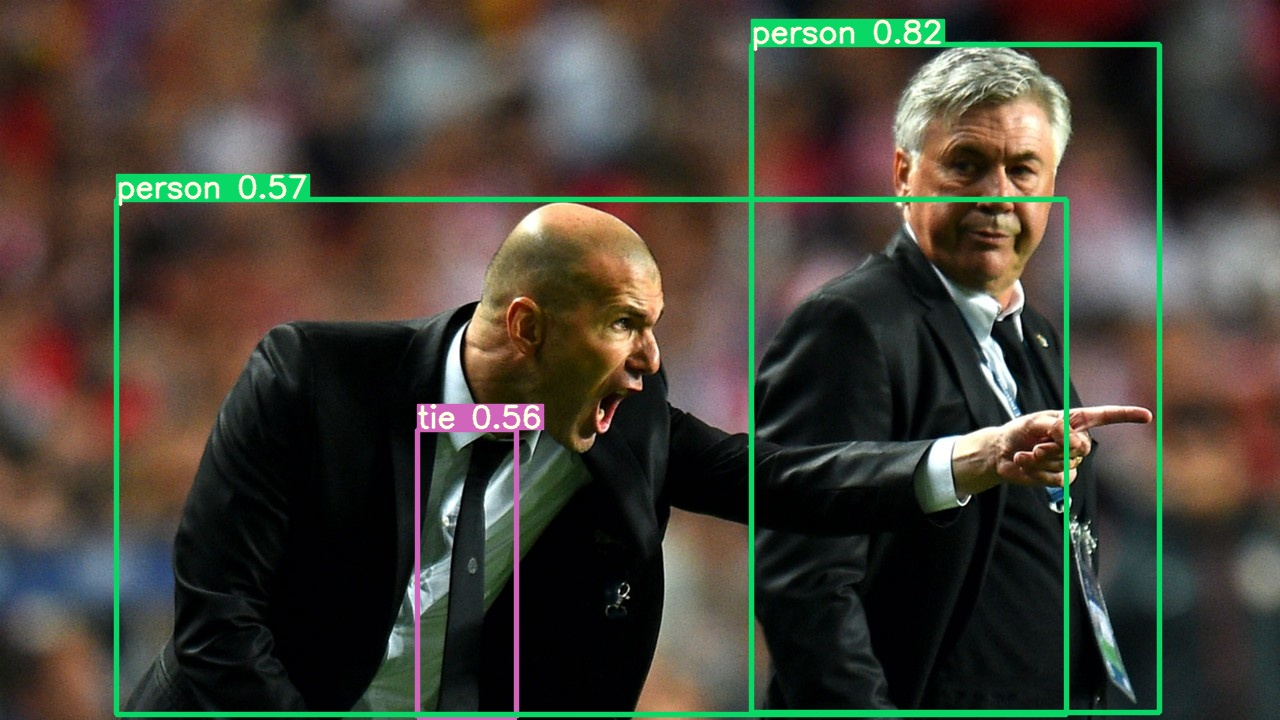

In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/
Image(filename='runs/detect/exp/zidane.jpg', width=600)

Results are saved to `runs/detect`. A full list of available inference sources:
<img src="https://user-images.githubusercontent.com/26833433/98274798-2b7a7a80-1f94-11eb-91a4-70c73593e26b.jpg" width="900"> 

# 3. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [4]:
# Download xView examples


In [5]:
project_id = 'xview-309010'

Los archivos de GCS se almacenan en <a href="https://cloud.google.com/storage/docs/key-terms#buckets">segmentos</a>.

Los segmentos deben tener un nombre global único, por lo que debemos crear uno.

In [6]:
import uuid
bucket_name = 'xview_train_images'

Para poder acceder a GCS, debemos autenticarnos.

In [7]:
from google.colab import auth
auth.authenticate_user()

Se puede acceder a GCS con la utilidad de línea de comandos <code>gsutil</code> o con la API de Python nativa.

## `gsutil`

En primer lugar, configuraremos <code>gsutil</code> para usar el proyecto que hemos especificado previamente con <code>gcloud</code>.

In [8]:
!gcloud config set project {project_id}

Updated property [core/project].


In [9]:
!mkdir ../xView
!mkdir ../xView/train

In [10]:
!gsutil -m cp -r gs://xview_train_images/s3 ../xView/train/

Copying gs://xview_train_images/s3/1036.tif...
Copying gs://xview_train_images/s3/104.tif...
Copying gs://xview_train_images/s3/1042.tif...
Copying gs://xview_train_images/s3/1037.tif...
Copying gs://xview_train_images/s3/1048.tif...
Copying gs://xview_train_images/s3/1046.tif...
Copying gs://xview_train_images/s3/105.tif...
Copying gs://xview_train_images/s3/1044.tif...
Copying gs://xview_train_images/s3/1049.tif...
Copying gs://xview_train_images/s3/1050.tif...
Copying gs://xview_train_images/s3/1051.tif...
Copying gs://xview_train_images/s3/1052.tif...
Copying gs://xview_train_images/s3/1053.tif...
Copying gs://xview_train_images/s3/1056.tif...
Copying gs://xview_train_images/s3/1058.tif...
Copying gs://xview_train_images/s3/106.tif...
Copying gs://xview_train_images/s3/1061.tif...
Copying gs://xview_train_images/s3/1063.tif...
Copying gs://xview_train_images/s3/1065.tif...
Copying gs://xview_train_images/s3/1067.tif...
| [20/20 files][551.9 MiB/551.9 MiB] 100% Done                 

In [11]:
# Dowloading bounding boxes data
!gsutil cp gs://xview_train_images/xView_train.geojson ../xView/train/

Copying gs://xview_train_images/xView_train.geojson...
\ [1 files][355.0 MiB/355.0 MiB]                                                
Operation completed over 1 objects/355.0 MiB.                                    


In [12]:
# Dowloading bounding boxes data
!gsutil cp gs://xview_train_images/xview_class_labels.txt ../xView/train/

Copying gs://xview_train_images/xview_class_labels.txt...
/ [1 files][  991.0 B/  991.0 B]                                                
Operation completed over 1 objects/991.0 B.                                      


In [13]:
# function to load bounding box data
import json
from tqdm import tqdm
import numpy as np
def get_labels(fname):
    """
    Processes a WorldView3 GEOJSON file

    Args:
        fname: filepath to the GeoJson file.

    Outputs:
      Bounding box coordinate array, Chip-name array, and Classes array

    """
    with open(fname) as f:
        data = json.load(f)

    coords = np.zeros((len(data['features']),4))
    chips = np.zeros((len(data['features'])),dtype="object")
    classes = np.zeros((len(data['features'])))

    for i in tqdm(range(len(data['features']))):
        if data['features'][i]['properties']['bounds_imcoords'] != []:
            b_id = data['features'][i]['properties']['image_id']
            val = np.array([int(num) for num in data['features'][i]['properties']['bounds_imcoords'].split(",")])
            chips[i] = b_id
            classes[i] = data['features'][i]['properties']['type_id']
            if val.shape[0] != 4:
                raise ValueError('A bounding box should have 4 entries!')
            else:
                coords[i] = val
        else:
            chips[i] = 'None'

    return coords, chips, classes

In [14]:
datapath = '../xView/train/'
fname = datapath+"xView_train.geojson"
coords, chips, classes = get_labels(fname)
coords, chips, classes

100%|██████████| 601937/601937 [00:03<00:00, 194618.71it/s]


(array([[2712., 1145., 2746., 1177.],
        [2720., 2233., 2760., 2288.],
        [2687., 1338., 2740., 1399.],
        ...,
        [2106.,  361., 2124.,  379.],
        [1917.,   38., 1958.,   64.],
        [2323.,   55., 2349.,   74.]]),
 array(['2355.tif', '2355.tif', '2355.tif', ..., '389.tif', '389.tif',
        '389.tif'], dtype=object),
 array([73., 73., 73., ..., 73., 73., 73.]))

In [15]:
# create dataframe with coordinates of bounding boxes, class of bounding box, 
# and image in which the bounding box appears
df_coords = pd.DataFrame(coords, columns = ['x0', 'y0', 'x1', 'y1'])
chips = pd.Series(chips, name = 'image_id')
classes = pd.Series(classes, name = 'classes')
df = pd.concat([df_coords, chips, classes], axis=1)
df.head()
del df_coords, chips, classes

In [110]:
MAIN_PATH = Path(f"../xView/train")
train_imgs_folder = "s3"
ORIG_IMGS_PATH = MAIN_PATH / train_imgs_folder

img_idx = 1036
df_img = df[df.image_id==str(img_idx)+'.tif']
df_img.shape

(265, 6)

In [17]:
dataset_type = 'train'

shapes_name = "shapes.txt"


'1036.tif'

In [18]:
img_path = images_path/filename
str(img_path)

'../xView/train/s3/1036.tif'

In [112]:
img_path = ORIG_IMGS_PATH /(str(img_idx)+'.tif')
print(img_path)
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread(img_path)
img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)

print(img.shape)
print(img.dtype)
print(img.max())


../xView/train/s3/1036.tif
(3215, 3195, 3)
uint8
255


In [113]:
# add n bounding boxes
n_box = 50
for index, row in df_img.sample(n=n_box).iterrows():
      cv2.rectangle(
        img,
        (int(row.x0), int(row.y0)),
        (int(row.x1), int(row.y1)),
        color=(0, 255, 0),
        thickness=2
      )

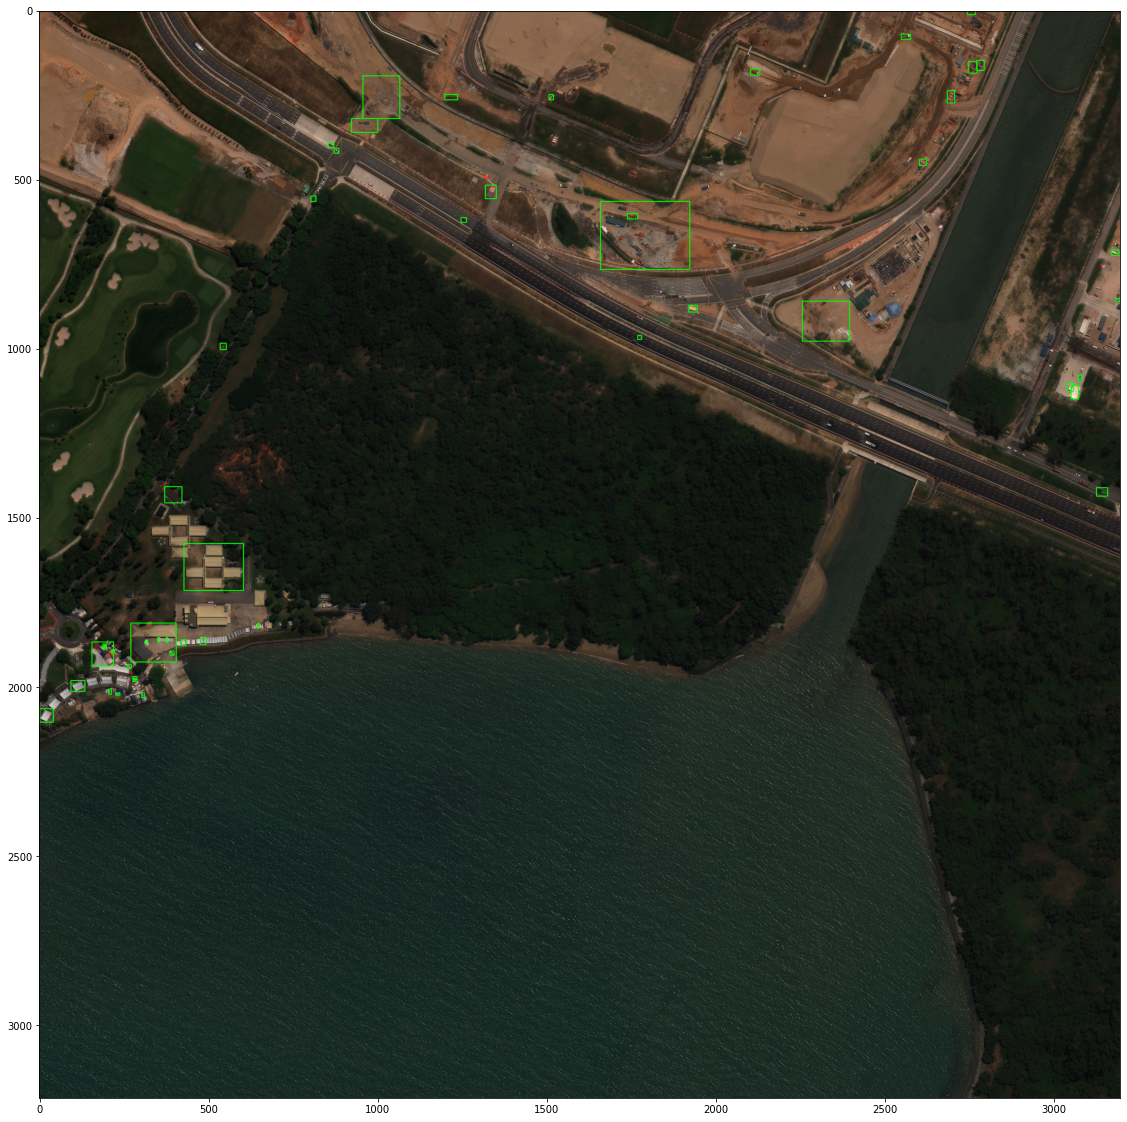

In [114]:
fig, ax = plt.subplots(figsize=(20,20));
plt.imshow(img)

# Create image chips from images


In [23]:
def xyxy2xywh(x):
    # Convert nx4 boxes from [x1, y1, x2, y2] to [x, y, w, h] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = (x[:, 0] + x[:, 2]) / 2  # x center
    y[:, 1] = (x[:, 1] + x[:, 3]) / 2  # y center
    y[:, 2] = x[:, 2] - x[:, 0]  # width
    y[:, 3] = x[:, 3] - x[:, 1]  # height
    return y

In [24]:
def xyxy2xywhn(x,img_width,img_height):
    # Convert nx4 boxes from [x1, y1, x2, y2] to [x, y, w, h] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = (x[:, 0] + x[:, 2]) / 2 / img_width   # x center
    y[:, 1] = (x[:, 1] + x[:, 3]) / 2 / img_height # y center
    y[:, 2] = (x[:, 2] - x[:, 0]) / img_width  # width
    y[:, 3] = (x[:, 3] - x[:, 1]) / img_height  # height
    return y

In [25]:
coords = df_img[['x0','y0','x1','y1']].values
labels = df_img['classes'].values
coords_darknet = xyxy2xywhn(coords,img.shape[0],img.shape[1])
export_array = np.hstack((labels.reshape((-1,1)),coords_darknet))
export_array

array([[ 6.40000000e+01,  8.57076205e-01, -1.09546166e-03,
         7.15396579e-03,  1.03286385e-02],
       [ 2.10000000e+01,  2.68429238e-01,  6.25978091e-04,
         4.97667185e-03,  5.63380282e-03],
       [ 7.90000000e+01,  7.79004666e-01,  8.92018779e-03,
         4.51010886e-02,  1.78403756e-02],
       ...,
       [ 6.30000000e+01,  7.11041991e-01,  9.38967136e-03,
         7.46500778e-03,  9.38967136e-03],
       [ 1.80000000e+01,  6.06376361e-01,  2.80594679e-01,
         4.66562986e-03,  2.19092332e-03],
       [ 3.20000000e+01,  7.73561431e-01,  2.92018779e-01,
         9.95334370e-03,  5.63380282e-03]])

In [100]:
CHIPS_PATH = MAIN_PATH / "chips"
CHIPS_PATH.mkdir(parents=True, exist_ok=True)

In [101]:
print(CHIPS_PATH)

../xView/train/chips


In [61]:
type(CHIPS_PATH)

pathlib.PosixPath

In [102]:
!rm -r ../xView/train/chips

In [65]:
def create_chip_filename(basename,extension,chip):
  idx_extension = basename.find(".")
  return basename[:idx_extension]+"_"+'{:02d}'.format(chip[0])+"_"+'{:02d}'.format(chip[1])+extension

In [103]:
def divide_image(chip_size, images_path, chips_path):
  # print("I'm in")
  chips_path_local = chips_path / str(chip_size) / "img"
  chips_path_local.mkdir(parents=True, exist_ok=True)
  for row, img_id in enumerate(tqdm([x for x in images_path.iterdir()], desc="Splitting images:")):
    filename = img_id.name
    if filename[-4:]=='.tif':
      # load image
      # print(f"Splitting image {filename}")
      img = cv2.cvtColor(cv2.imread(str(images_path/filename)), cv2.COLOR_BGR2RGB)


      # split image coords
      x_split = np.arange(0, img.shape[1], chip_size)
      y_split = np.arange(0, img.shape[0], chip_size)
      # save coords data
      # print(chips_path_local / (filename[:-4]+".txt"))
      with (chips_path_local / (filename[:-4]+".txt")).open(mode="w") as f:
        
        # f.write("hello")
        np.savetxt(f, x_split[np.newaxis], delimiter = " ", fmt="%d")
        np.savetxt(f, y_split[np.newaxis], delimiter = " ", fmt="%d")

      # split image in chips, save each chip
    

      # fig, ax = plt.subplots(figsize=(20,20), ncols=len(x_split)-1, nrows = len(y_split)-1)
      # print(img.shape)

      
      for j in range(len(y_split)-1):
        for i in range(len(x_split)-1):
          img_split = img[y_split[j]:y_split[j+1],x_split[i]:x_split[i+1],:]
          # ax[j,i].imshow(img_split)
          # ax[j,i].axis('off')
          # save image
          img_name = str(chips_path_local / create_chip_filename(filename,".tif", (i,j)))
          status = cv2.imwrite(img_name,img_split)            
          # print(f"{img_name} written to file-system : ",status)


      # plt.subplots_adjust(wspace=0, hspace=0)

In [104]:
chip_size = 300
# print(CHIPS_PATH)
divide_image(chip_size, images_path, CHIPS_PATH)

Splitting images:: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]


In [105]:
CHIPS_PATH = CHIPS_PATH/str(chip_size)/"img"

In [106]:
CHIPS_PATH.parent

PosixPath('../xView/train/chips/300')

In [31]:
def intersection_bool(A, B, min_px = 1):
  '''This function calculates if two rectangles A and B, defined by numpy arrays
  containing upper left and bottom right coordinates, intersect.
  Both numpy arrays are formatted the same way: [x0, y0, x1, y1]
  Output is a boolean indicating the intersection or not'''
  # print(f"shape of A {A.shape} and B {B.shape}") 
  C1, C2, C3, C4 = (A[0]>B[2]-min_px), (B[0]>A[2]-min_px) , (A[1]>B[3]-min_px) , (B[1]>A[3]-min_px)
  # print(C1,C2,C3,C4)
  intersection = not(C1 or C2 or C3 or C4)
  return intersection

In [32]:
A = np.array([2, 0, 3, 3])
B = np.array([1, 1, 1.5, 2])

intersection_bool(A, B)

False

In [81]:
def rel_trim_bbox(bound_coords,chip_coords):
  '''Obtain relative coordinates of bounding box to a given chip, and trim
  those parts of the bounding box that are outside the chip. Both the bounding
  box coordinates and the chip coordinates are in pixels in format [x0,y0,x1,y1]
  '''
  #obtain relative coordinates:
  rel_bbox = bound_coords-np.tile(chip_coords[:2], 2)
  rel_bbox[:2] = np.maximum(rel_bbox[:2], [0,0])
  # the x1 y1 coordinates of the chip need to be expressed in relative coordinates
  # and then we take the minimum between the outside of the chip and
  # the relative bounding box
  rel_bbox[2:] = np.minimum(rel_bbox[2:], chip_coords[2:]-chip_coords[:2])
  return rel_bbox

In [85]:
aaa = rel_trim_bbox(np.array([250, 380, 350, 600]), np.array([300, 300, 600, 600]))

In [86]:
np.hstack((3,aaa))

array([  3,   0,  80,  50, 300])

In [107]:
def divide_bound_box(chips_path):
  
  
  # iterate through available images: there should be a .txt
  for f_count, img_id in enumerate(tqdm([x for x in chips_path.glob("*.txt")])):
    filename = img_id.name
    # print(filename)   
    df_img = df[df.image_id==filename[:-4]+".tif"]
    coords = df_img[['x0','y0','x1','y1']].values
    labels = df_img['classes'].values

    with (chips_path / filename).open(mode="r") as f:
      x_split = f.readline().strip("\n").split(" ")      
      y_split = f.readline().strip("\n").split(" ")
      
    x_split = np.array([int(x) for x in x_split])
    y_split = np.array([int(y) for y in y_split])

    chip_size = x_split[1]-x_split[0]

    n_chips = (len(x_split)-1)*(len(y_split)-1)
    n_bbox = coords.shape[0]

    chip_coords = np.zeros((n_chips,4), dtype = 'int')

    # create same type of array for chip coordinates
    count = 0
    for j, y in enumerate(y_split[:-1]):
      for i, x in enumerate(x_split[:-1]):
        # Create chip coordinates
        # chip_coords[count,:] = [x_split[i], y_split[j], x_split[i+1], y_split[j+1]]
        chip_coords = np.array([x_split[i], y_split[j], x_split[i+1], y_split[j+1]])

        # assess if bounding boxes are in a chip and write the bounding box to
        # txt file
        bound_box_path = chips_path.parent / "bound_box" 
        bound_box_path.mkdir(parents=True, exist_ok=True)
        # darknet_box_path = chips_path.parent / "darknet_box" 
        # darknet_box_path.mkdir(parents=True, exist_ok=True)        
        bbox_file = bound_box_path / create_chip_filename(filename, ".txt", (i,j))
        with bbox_file.open(mode="w+") as f:
          for row in range(n_bbox):
            if(intersection_bool(chip_coords, coords[row,:])):
              # relative bbox coordinates trimmed:
              rel_bbox_coords = rel_trim_bbox(
                  coords[row,:],
                  chip_coords
              )

              export_array = np.hstack((labels[row],rel_bbox_coords))
              np.savetxt(f, export_array[np.newaxis], delimiter = " ", fmt="%d")       

In [108]:
divide_bound_box(CHIPS_PATH)

100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


### Image reconstruction

In [144]:
img_path = ORIG_IMGS_PATH /(str(img_idx)+'.tif')
print(img_path)
import cv2
import matplotlib.pyplot as plt

# img = cv2.imread(img_path)
img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)

print(img.shape)
print(img.dtype)
print(img.max())


../xView/train/s3/1036.tif
(3215, 3195, 3)
uint8
255


In [145]:
# add n bounding boxes
n_box = len(df_img)
for index, row in df_img.sample(n=n_box).iterrows():
      cv2.rectangle(
        img,
        (int(row.x0), int(row.y0)),
        (int(row.x1), int(row.y1)),
        color=(0, 255, 0),
        thickness=2
      )

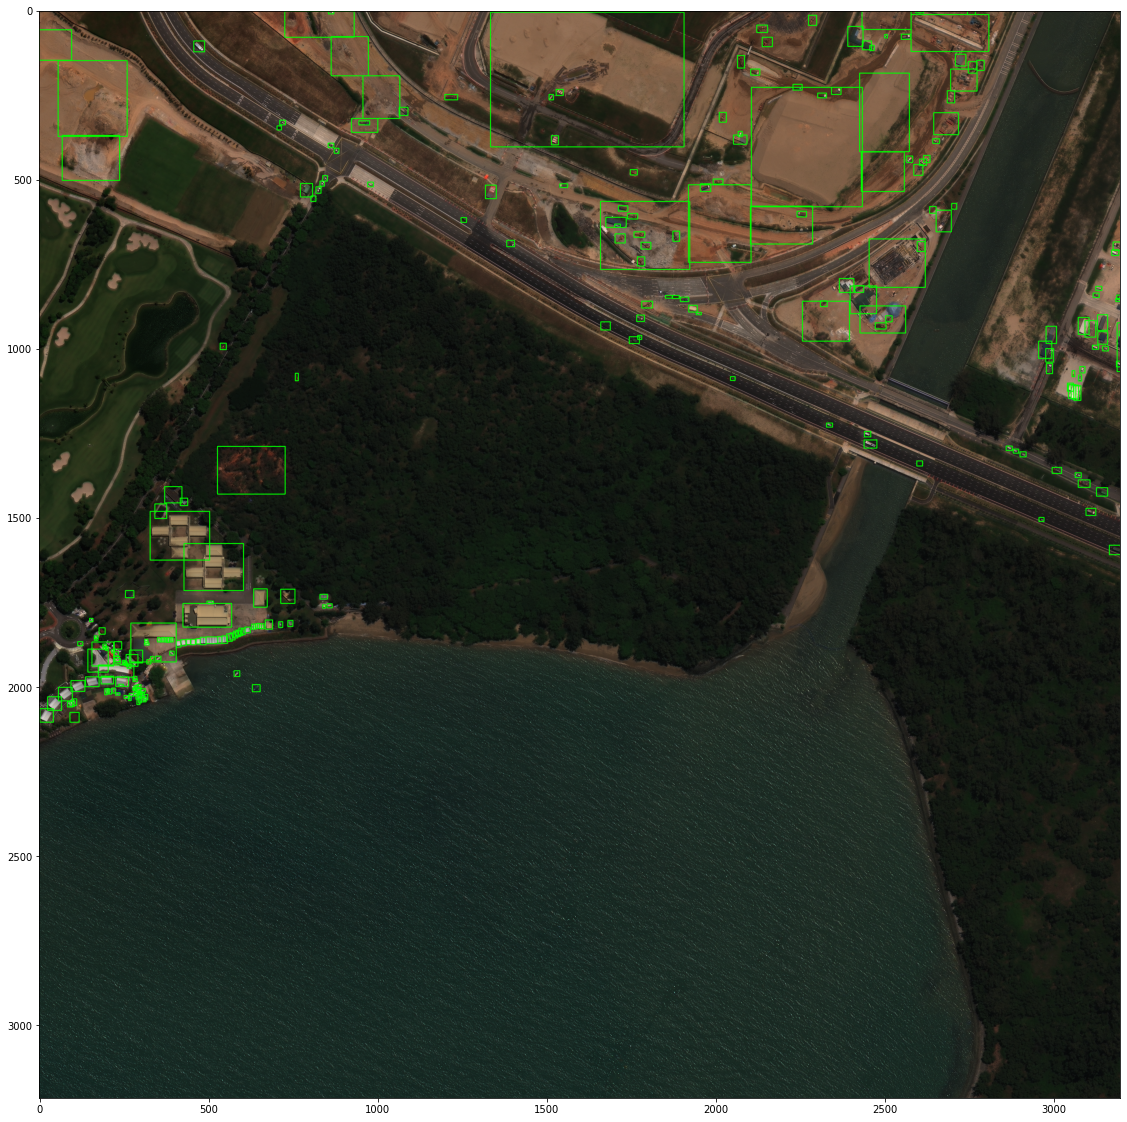

In [146]:
fig, ax = plt.subplots(figsize=(20,20));
plt.imshow(img)

In [117]:
n_chips = [s//chip_size for s in img.shape[:-1]]
n_chips

[10, 10]

In [118]:
CHIPS_PATH

PosixPath('../xView/train/chips/300/img')

In [123]:
img_path.name

'1036.tif'

In [135]:
str(bbox_path)

'../xView/train/chips/300/bound_box/1036_01_00.txt'

In [140]:
bbox_coords = np.loadtxt(str(bbox_path), delimiter= ' ', dtype=int)
bbox_coords

array([[ 79,   0,  58,  96, 148],
       [ 79,  56, 149, 260, 300]])

In [141]:
bbox_coords = bbox_coords.reshape((-1,5))
bbox_coords

array([[ 79,   0,  58,  96, 148],
       [ 79,  56, 149, 260, 300]])

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "../xView/train/chips/300/bound_box/1036_01_01.txt"
  app.launch_new_instance()
 20%|██        | 2/10 [00:00<00:00, 15.48it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "../xView/train/chips/300/bound_box/1036_00_02.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "../xView/train/chips/300/bound_box/1036_01_02.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "../xView/train/chips/300/bound_box/1036_02_02.txt"
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: loadtxt: Empty input file: "../xView/train/chips/300/bound_box/1036_03_02.txt"
  app.launch_new_in

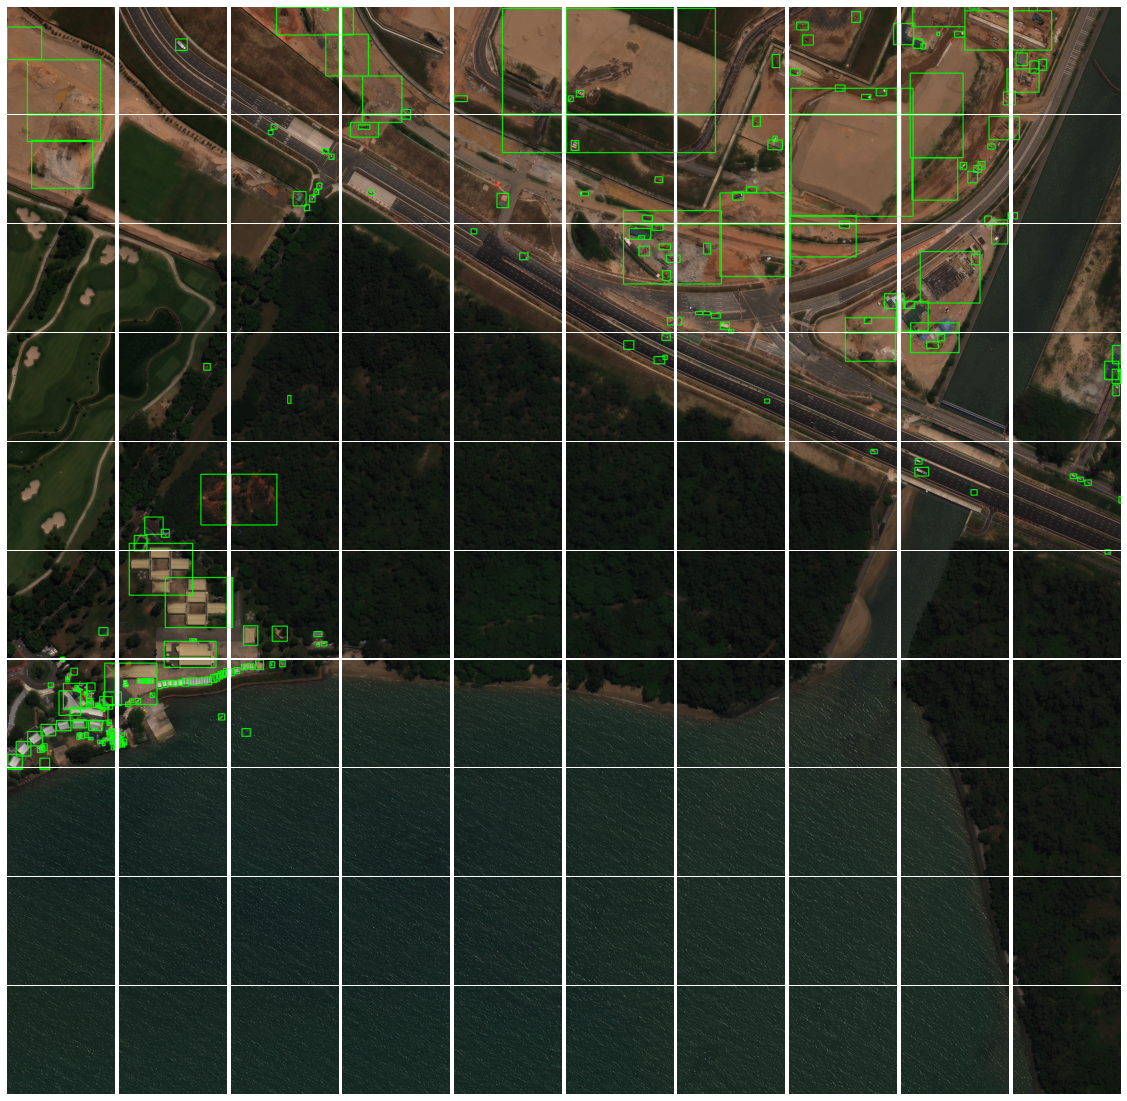

In [143]:
# loop to read image chips and bounding boxes coordinates 

fig, ax = plt.subplots(figsize=(2*n_chips[0],2*n_chips[1]), ncols=n_chips[0], nrows = n_chips[1])
# print(img.shape)


for j in tqdm(range(n_chips[1])):
  for i in range(n_chips[0]):     
    # load image
    img_name_split = str(CHIPS_PATH / create_chip_filename(img_path.name,".tif", (i,j)))
    img_split = cv2.imread(str(img_name_split))#, cv2.COLOR_BGR2RGB)

    # load relative bounding box coordinates
    bbox_path = (CHIPS_PATH.parent / "bound_box"/create_chip_filename(img_path.name,".txt", (i,j)))
    try:
      bbox_coords = np.loadtxt(str(bbox_path), delimiter= ' ', dtype=int)
      bbox_coords = bbox_coords.reshape((-1,5))
      for row in range(bbox_coords.shape[0]):
        cv2.rectangle(
          img_split,
          (bbox_coords[row,1], bbox_coords[row,2]),
          (bbox_coords[row,3], bbox_coords[row,4]),
          color=(0, 255, 0),
          thickness=2
        )
    except OSError:
      print(f"WARNING {str(bbox_path)} not found")
    

    # plot all of it
    ax[j,i].imshow(img_split)
    ax[j,i].axis('off')
            
    # print(f"{img_name} written to file-system : ",status)


plt.subplots_adjust(wspace=0.01, hspace=0.01)

## Put chips in darknet format

In [ ]:
def chips_darknet_labels():
  # image loop
    # read chip sizes
    # load bounding boxes
    # transform to darknet
    # save in new folder

In [ ]:
# create labels in darknet format

def create_dataset(dataset_type):
  main_path = Path(f"../xView/{dataset_type}")
  shapes_name = "shapes.txt"
  images_path = main_path / "s3"
  labels_path = main_path / "labels"
  labels_path.mkdir(parents=True, exist_ok=True)
  number_format = "%1.5f"
  row_format = "%d "+" ".join([number_format]*4)

  # remove the file if it exists already
  if (main_path / shapes_name).exists(): (main_path / shapes_name).unlink()

  for row, img_id in enumerate([x for x in images_path.iterdir()]):
    filename = img_id.name
    if filename[-4:]=='.tif':
      label_name = f"{filename[:-4]}.txt"
      df_img = df[df.image_id==filename]
      coords = df_img[['x0','y0','x1','y1']].values
      labels = df_img['classes'].values
      img = cv2.imread(str(images_path/filename))
      coords_darknet = xyxy2xywhn(coords,img.shape[0],img.shape[1])
      export_array = np.hstack((labels.reshape((-1,1)),coords_darknet))

      # export shape of img
      

      with (main_path / shapes_name).open(mode="a+") as f:
        # Move read cursor to the start of file.
        f.seek(0)
        # If file is not empty then append '\n'
        data = f.read(100)
        if len(data) > 0:
            f.write("\n")
        
        f.write(f"{filename} {img.shape[0]} {img.shape[1]}")

      # export labels
      with (labels_path / label_name).open(mode="w") as label_file:
        np.savetxt(label_file, export_array, fmt=row_format)

In [ ]:
create_dataset('train')

**Estoy aquí**. comprobarlo porque me salen números negativos

In [ ]:
images_path = Path(f"../xView/train/s3")
img_names = [x for x in images_path.iterdir()]

In [ ]:
img1_path = img_names[0]

In [ ]:
img1_path.name

'1037.tif'

Train a YOLOv5s model on [COCO128](https://www.kaggle.com/ultralytics/coco128) with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and **COCO, COCO128, and VOC datasets are downloaded automatically** on first use.

All training results are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train

In [ ]:
# Weights & Biases (optional)
%pip install -q wandb  
!wandb login  # use 'wandb disabled' or 'wandb enabled' to disable or enable

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v4.0-137-g9b11f0c torch 1.8.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='', data='./data/coco128.yaml', device='', entity=None, epochs=3, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-03-14 04:18:58.124672: I tensorflow/stream_executor/platform/default/dso_loader

# 2. Test
Test a model on [COCO](https://cocodataset.org/#home) val or test-dev dataset to evaluate trained accuracy. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val2017
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [ ]:
# Download COCO val2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
YOLOv5 🚀 v4.0-137-g9b11f0c torch 1.8.0+cu101 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

100% 168M/168M [00:02<00:00, 59.1MB/s]

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
val: Scanning '../coco/val2017' for images and labels... 4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:01<00:00, 3236.68it/s]
val: New cache created: ../coco/val2017.cache
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [01:20<00:00,  1.95it/s]
                 all        5000       36335       0.749       0.619        0.68       0.486
Speed: 5.3/1.7/6.9 ms inference/NMS/total per 640x640 i

## COCO test-dev2017
Download [COCO test2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L15) dataset (7GB - 40,000 images), to test model accuracy on test-dev set (20,000 images). Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip  # unzip labels
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
%mv ./test2017 ./coco/images && mv ./coco ../  # move images to /coco and move /coco next to /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 using --task test
!python test.py --weights yolov5s.pt --data coco.yaml --task test

# 4. Visualize

## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://www.wandb.com/) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<img src="https://user-images.githubusercontent.com/26833433/98184457-bd3da580-1f0a-11eb-8461-95d908a71893.jpg" width="800">

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and test jpgs to see mosaics, labels, predictions and augmentation effects. Note a **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
Image(filename='runs/train/exp/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

> <img src="https://user-images.githubusercontent.com/26833433/83667642-90fcb200-a583-11ea-8fa3-338bbf7da194.jpeg" width="750">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/83667626-8c37fe00-a583-11ea-997b-0923fe59b29b.jpeg" width="750">  
`test_batch0_labels.jpg` shows test batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/83667635-90641b80-a583-11ea-8075-606316cebb9c.jpeg" width="750">  
`test_batch0_pred.jpg` shows test batch 0 _predictions_


Training losses and performance metrics are also logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and a custom `results.txt` logfile which is plotted as `results.png` (below) after training completes. Here we show YOLOv5s trained on COCO128 to 300 epochs, starting from scratch (blue), and from pretrained `--weights yolov5s.pt` (orange).

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp')  # plot all results*.txt as results.png
Image(filename='runs/train/exp/results.png', width=800)

<img src="https://user-images.githubusercontent.com/26833433/97808309-8182b180-1c66-11eb-8461-bffe1a79511d.png" width="800">


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([test.py](https://github.com/ultralytics/yolov5/blob/master/test.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/models/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
%rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  !python test.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python test.py --weights $m.pt --device $d # test official
    python test.py --weights runs/train/exp/weights/best.pt --device $d # test custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python models/export.py --weights $m.pt --img 640 --batch 1  # export
done

In [ ]:
# Profile
from utils.torch_utils import profile 

m1 = lambda x: x * torch.sigmoid(x)
m2 = torch.nn.SiLU()
profile(x=torch.randn(16, 3, 640, 640), ops=[m1, m2], n=100)

In [ ]:
# Evolve
!python train.py --img 640 --batch 64 --epochs 100 --data coco128.yaml --weights yolov5s.pt --cache --noautoanchor --evolve
!d=runs/train/evolve && cp evolve.* $d && zip -r evolve.zip $d && gsutil mv evolve.zip gs://bucket  # upload results (optional)

In [ ]:
# VOC
for b, m in zip([64, 48, 32, 16], ['yolov5s', 'yolov5m', 'yolov5l', 'yolov5x']):  # zip(batch_size, model)
  !python train.py --batch {b} --weights {m}.pt --data voc.yaml --epochs 50 --cache --img 512 --nosave --hyp hyp.finetune.yaml --project VOC --name {m}